#**Universidad Galileo**
##Statistical Learning II - Tarea extra XOR
###César Luis Polanco
###20062088


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Definición de funciones

In [9]:
def operacion_not_vector(x):
    b = np.ones(x.shape) #Matriz de 1
    b = np.vstack((x,b)).astype(int) #forzar 0-1
    a = np.array([[-1,1]])
    return np.matmul(a,b)

In [10]:
m = np.array([1,1,1,0,0,0,0,1,0,1,0,1,1])
print(operacion_not_vector(m))

[[0 0 0 1 1 1 1 0 1 0 1 0 0]]


In [11]:
def operacion_and(x1, x2):
    return np.int_((x1 * x2)> 0)

In [12]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,0,1,1,0])

operacion_and(a, b)


array([0, 0, 0, 0, 1, 0])

In [15]:
def operacion_or(x1,x2):
    return np.int_((x1 + x2)> 0)

In [16]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,0,1,1,0])

operacion_or(a, b)

array([1, 1, 1, 1, 1, 0])

In [17]:
def operacion_xor(x1,x2): 
    return operacion_and(operacion_not_vector(operacion_and(x1,x2)),operacion_or(x1,x2))

In [18]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,0,1,1,0])
operacion_xor(a, b)

array([[1, 1, 1, 1, 0, 0]])

## Definición de perceptrones

In [32]:
def perceptron_and(a,b):
    c = np.vstack((a,b)) #stack
    w = np.ones(c.shape[0])
    return np.int_(np.matmul(w,c)> 1) #Step-function

In [31]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,1,1,1,0])
perceptron_and(a, b)

array([0, 0, 1, 0, 1, 0])

In [33]:
def perceptron_or(a,b):    
  c = np.vstack((a,b))
  w = np.ones(c.shape[0])
  return np.int_(np.matmul(w,c)> 0) #Step-function

In [34]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,1,1,1,0])
perceptron_or(a, b)

array([1, 1, 1, 1, 1, 0])

In [41]:
def perceptron_xor(a,b):
  return perceptron_and(operacion_not_vector(perceptron_and(a,b)),perceptron_or(a,b))

In [42]:
a= np.array([1,0,1,0,1,0])
b= np.array([0,1,1,1,1,0])
perceptron_xor(a, b)

array([1, 1, 0, 1, 0, 0])

## Graficar resultados

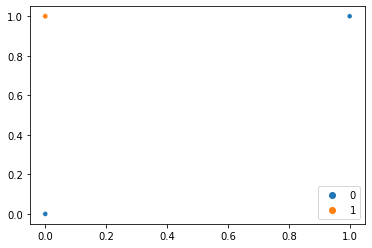

In [46]:
a= np.array([1,1,0,0])
b= np.array([0,1,0,1])

p_and = perceptron_and(a,b)
p_or = perceptron_or(a,b)
vnot = operacion_not_vector(p_and)

sb.scatterplot(x=p_and, y=p_or,s=25, hue=xor)

## Conclusiones

El manejo de la función step en conjunto con la descomposición de funciones (and,not,or) facilita encontrar la linealidad de los datos. De esta manera se puede separar los valores 0 y 1